### 1 - Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix
import itertools

### 2 - Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape : ', x_train.shape)
print('y_train shape : ', y_train.shape)
print('x_test shape : ', x_test.shape)
print('y_test shape : ', y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
x_train shape :  (50000, 32, 32, 3)
y_train shape :  (50000, 1)
x_test shape :  (10000, 32, 32, 3)
y_test shape :  (10000, 1)


### 3 - Preprocessing of Data

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0
## değerlerin 0 ile 1 arasına ölçeklendirilmesini sağlar.
y_train, y_test = y_train.flatten(), y_test.flatten()
## bu işlem onları tek boyutlu bir diziye dönüştürür
print('x_train shape : ', x_train.shape)
print('y_train shape : ', y_train.shape)
print('x_test shape : ', x_test.shape)
print('y_test shape : ', y_test.shape)

x_train shape :  (50000, 32, 32, 3)
y_train shape :  (50000,)
x_test shape :  (10000, 32, 32, 3)
y_test shape :  (10000,)


#### Number of Classes

In [4]:
K = len(set(y_train))
print(f'Number of Classes : {K}')

Number of Classes : 10


### 4 - Build the model using Functional API

In [5]:
i = Input(shape = x_train[0].shape)
# x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 2, activation = 'relu')(i)
# x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 2, activation = 'relu')(x)
# x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 2, activation = 'relu')(x)
# x = Flatten()(x)
# x = Dropout(0.2)(x)
# x = Dense(units = 128, activation = 'relu')(x)
# x = Dropout(0.2)(x)
# x = Dense(units = K, activation = 'softmax')(x)

x = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu')(i)
x = BatchNormalization()(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2, 2))(x)

x = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu')(i)
x = BatchNormalization()(x)
x = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2, 2))(x)

x = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu')(i)
x = BatchNormalization()(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)


model = Model(i, x)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization_4 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0     

### Compile and Fit

In [7]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 20, batch_size = 32, verbose = 1)

Epoch 1/20
1563/1563 [==============================] - 44s 20ms/step - loss: 2.0456 - accuracy: 0.4244 - val_loss: 1.3447 - val_accuracy: 0.5239
Epoch 2/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2537 - accuracy: 0.5593 - val_loss: 1.2954 - val_accuracy: 0.5791
Epoch 3/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1029 - accuracy: 0.6148 - val_loss: 1.2508 - val_accuracy: 0.5748
Epoch 4/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9839 - accuracy: 0.6561 - val_loss: 1.2520 - val_accuracy: 0.5884
Epoch 5/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8850 - accuracy: 0.6919 - val_loss: 1.0565 - val_accuracy: 0.6506
Epoch 6/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7914 - accuracy: 0.7220 - val_loss: 1.0509 - val_accuracy: 0.6613
Epoch 7/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7283 - accuracy: 0.7465 - val_loss: 1.1666 -

### 5 - Plotting model results


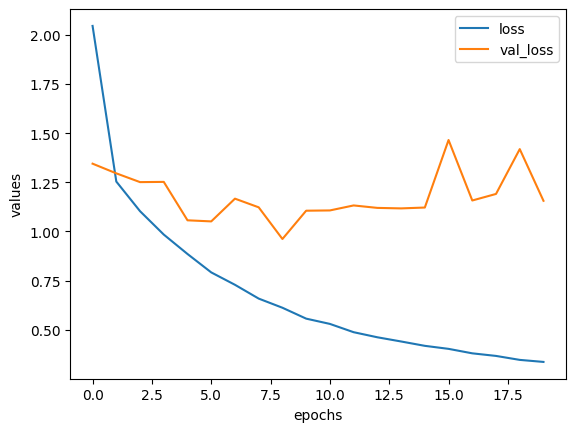

In [8]:
### Loss plot
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('values')
plt.legend()
plt.show()

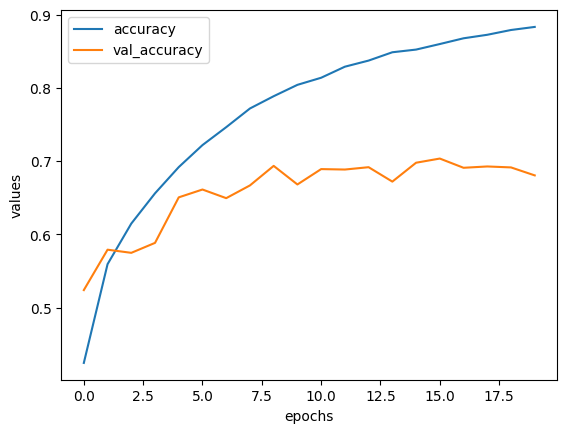

In [9]:
### Accuracy plot
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('values')
plt.legend()
plt.show()

### Plot the confusion_matrix

313/313 [==============================] - 1s 4ms/step
confusion matrix, without normalization
[[687  14  59  38  18   7   7  13  91  66]
 [ 16 733   6  27   6   5   7   5  36 159]
 [ 78   0 494 100  92  69  91  38  13  25]
 [ 21   3  39 541  60 210  66  29  11  20]
 [ 24   1  62  99 595  53  75  63  13  15]
 [  9   1  37 173  36 682  13  29   8  12]
 [  7   1  33 100  39  38 763   5   4  10]
 [  8   1  19  69  41 121   9 705   3  24]
 [ 59  24  24  29   9  13   6   3 786  47]
 [ 24  47   4  42   5   7   7  14  30 820]]
---------------------------------------------


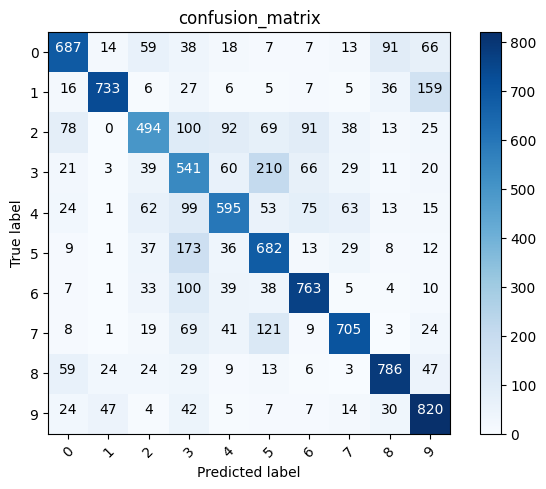

In [10]:
def plot_conf_matrix(cm, classes, normalize = False, title = 'confusion_matrix', cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print('Normalized confusion matrix')

  else:
    print('confusion matrix, without normalization')

  print(cm)
  print("---------------------------------------------")
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_conf_matrix(cm, list(range(10)))


### Label mapping

In [11]:
labels = '''
Airplane_(Uçak)
Automobile_(Otomobil)
Bird_(Kuş)
Cat_(Kedi)
Deer_(Geyik)
Dog_(Köpek)
Frog_(Kurbağa)
Horse_(At)
Ship_(Gemi)
Truck_(Kamyon)'''.split()

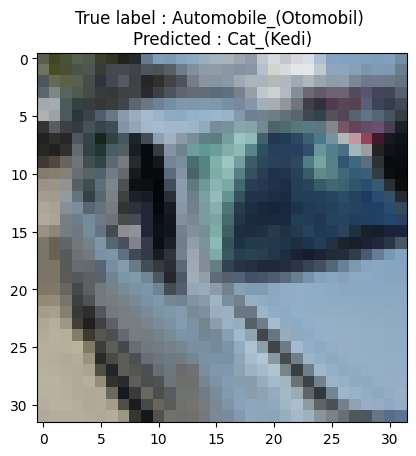

In [12]:
## show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32, 32, -1), cmap = 'gray')
plt.title('True label : %s \nPredicted : %s' % (labels[y_test[i]], labels[p_test[i]]));


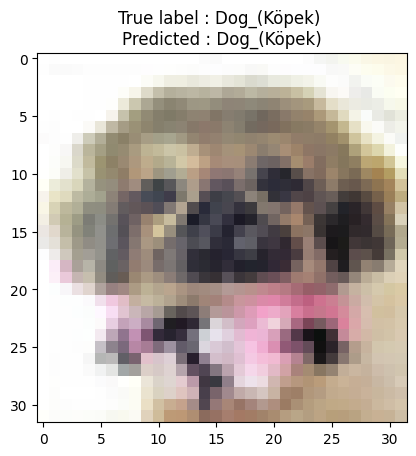

In [13]:
## show some classified examples
misclassified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32, 32, -1), cmap = 'gray')
plt.title('True label : %s \nPredicted : %s' % (labels[y_test[i]], labels[p_test[i]]));

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.1557 - accuracy: 0.6806


[1.1556885242462158, 0.6805999875068665]

### 6 - Data Augmentation

In [15]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1,
                                                                 height_shift_range = 0.1, horizontal_flip = True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
history = model.fit_generator(train_generator, validation_data = (x_test, y_test), steps_per_epoch = steps_per_epoch, epochs = 20)

Epoch 1/20
1562/1562 [==============================] - 42s 26ms/step - loss: 1.1414 - accuracy: 0.6219 - val_loss: 0.9343 - val_accuracy: 0.6879
Epoch 2/20
1562/1562 [==============================] - 41s 26ms/step - loss: 1.0025 - accuracy: 0.6600 - val_loss: 0.9454 - val_accuracy: 0.6961
Epoch 3/20
1562/1562 [==============================] - 43s 27ms/step - loss: 0.9592 - accuracy: 0.6733 - val_loss: 0.9309 - val_accuracy: 0.7093
Epoch 4/20
1562/1562 [==============================] - 41s 26ms/step - loss: 0.9321 - accuracy: 0.6824 - val_loss: 0.8157 - val_accuracy: 0.7282
Epoch 5/20
1562/1562 [==============================] - 42s 27ms/step - loss: 0.9003 - accuracy: 0.6951 - val_loss: 0.7735 - val_accuracy: 0.7416
Epoch 6/20
1562/1562 [==============================] - 41s 26ms/step - loss: 0.8777 - accuracy: 0.7034 - val_loss: 0.8035 - val_accuracy: 0.7352
Epoch 7/20
1562/1562 [==============================] - 40s 26ms/step - loss: 0.8658 - accuracy: 0.7047 - val_loss: 0.8504 -

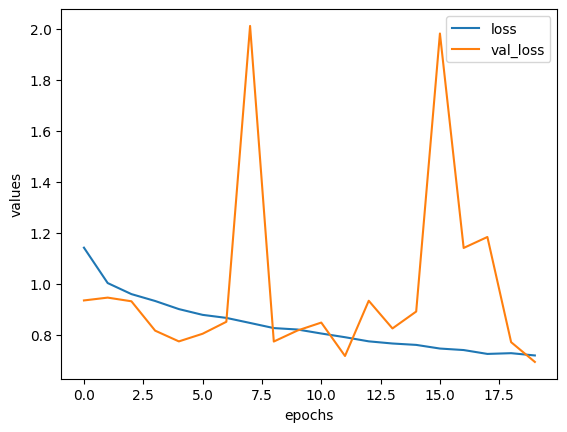

In [16]:
### Loss plot
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('values')
plt.legend()
plt.show()

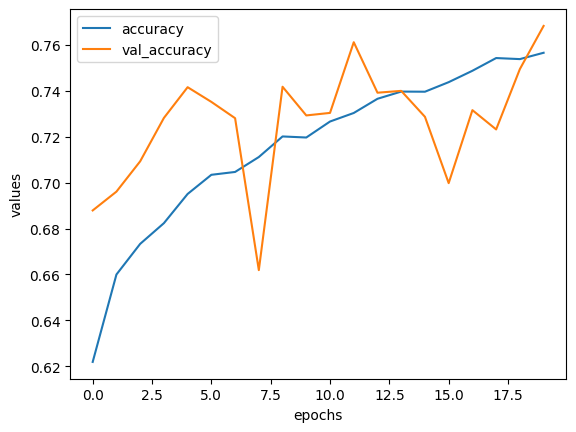

In [17]:
### Accuracy plot
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('values')
plt.legend()
plt.show()

313/313 [==============================] - 1s 4ms/step
confusion matrix, without normalization
[[766  14  43  53  14   5  12  15  28  50]
 [  8 916   1   8   0   2   3   3   9  50]
 [ 42   4 614  63  65  80  79  38   5  10]
 [  8   8  33 578  55 182  72  46   5  13]
 [ 12   3  40  62 667  52  65  94   2   3]
 [  8   2   9 139  27 734  23  51   2   5]
 [  4   5  21  41  15  16 888   9   0   1]
 [  5   1  12  18  20  54   8 875   0   7]
 [ 66  38  13  14   9   9   7   7 774  63]
 [ 15  62   4  12   2   4   6  17   7 871]]
---------------------------------------------


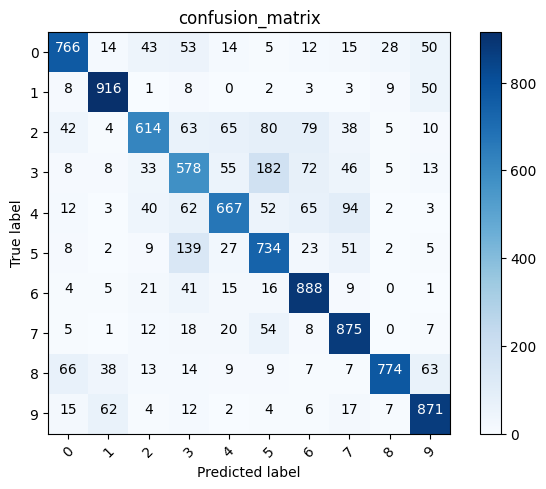

In [18]:
def plot_conf_matrix(cm, classes, normalize = False, title = 'confusion_matrix', cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print('Normalized confusion matrix')

  else:
    print('confusion matrix, without normalization')

  print(cm)
  print("---------------------------------------------")
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_conf_matrix(cm, list(range(10)))


In [19]:
labels = '''
Airplane_(Uçak)
Automobile_(Otomobil)
Bird_(Kuş)
Cat_(Kedi)
Deer_(Geyik)
Dog_(Köpek)
Frog_(Kurbağa)
Horse_(At)
Ship_(Gemi)
Truck_(Kamyon)'''.split()

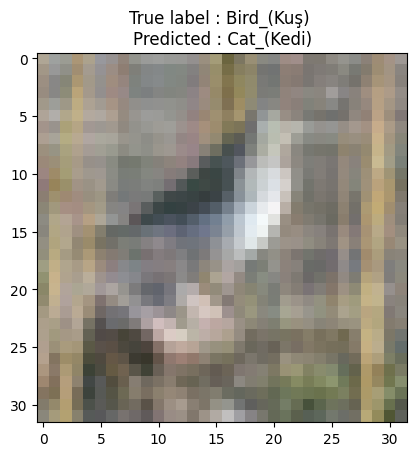

In [20]:
## show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32, 32, -1), cmap = 'gray')
plt.title('True label : %s \nPredicted : %s' % (labels[y_test[i]], labels[p_test[i]]));

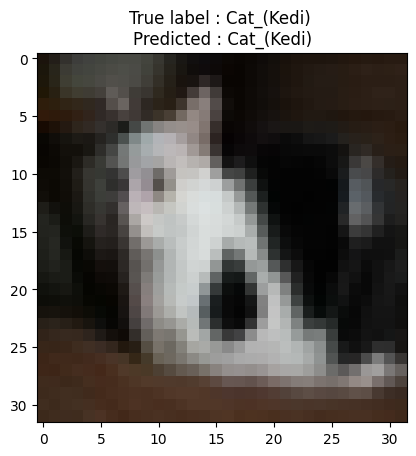

In [21]:
## show some classified examples
misclassified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32, 32, -1), cmap = 'gray')
plt.title('True label : %s \nPredicted : %s' % (labels[y_test[i]], labels[p_test[i]]));

In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.6929 - accuracy: 0.7683


[0.6929015517234802, 0.7682999968528748]